# Homework 3

## Your Name Here (or your names here if you are pair programming)

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

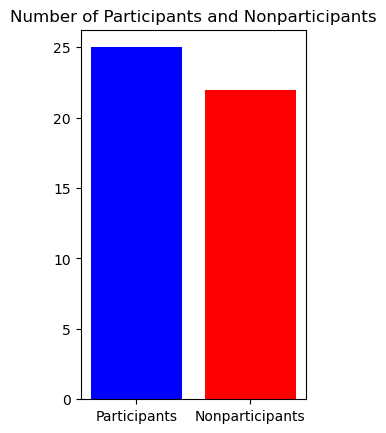

<Figure size 1200x600 with 0 Axes>

In [4]:
#import and read the files as pandas dataframes
non_participants = pd.read_csv('nonparticipants.csv')
participants = pd.read_csv('participants.csv')

prt_num = participants.size
nprt_num = non_participants.size

plt.subplot(1, 2, 1)
plt.bar(['Participants', 'Nonparticipants'], [prt_num, nprt_num], label = ['Participants', 'Nonparticipants'], color = ['blue', 'red'])
plt.title("Number of Participants and Nonparticipants")



plt.figure(figsize=(12, 6))
plt.show()

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [ ]:
# Add your code or descriptions here 

# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [ ]:
# Add your code or descriptions here 

# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [ ]:
# Add your code or descriptions here 